# Data Set Information:
The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

# Feature Information:
- The dataset consists of 10 numerical and 8 categorical features. The 'Revenue' feature can be used as the class label.

- Features:

- Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.
#The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action.

- "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site.

- The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.

- The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.

- The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 

- "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction.

- The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.      

- The dataset also includes "Operating Systems", "Browser", "Region", "Traffic Type", "Visitor Type" as returning or new visitor, 
- Boolean value indicating whether the date of the visit is "weekend", "month" of the year, and finally the target variable, "Revenue"

# Workflow stages: 

- The competition solution workflow goes through seven stages described in the Data Science Solutions book.

- Question or problem definition.

- Acquire data

- Prepare, cleanse the data.

- Analyze, identify patterns, and explore the data using visualization

- Model, predict and solve the problem.

- Visualize and report the score of prediction, and select the model


# Acquiring and Loading Data

Presenting the code  for importing libraries and loading the data into appropriate format for analysis


In [75]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('C:/Users/raehy/Downloads/online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# Data Cleaning
- Check missing data and dropping rows with missing data


In [4]:
df.describe() # Noticed that there is discrepancy in count between numeric and categorical variables

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
# Categorical features have 20 rows less than the rest of features 
# To make row even across all features, delete the 20 rows


In [6]:
df.dropna(inplace=True) 
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0.0,0.0,0.0,0.0,3.0,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [7]:
df.shape #Verify that rows with NaN data are deleted

(12316, 18)

In [8]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

# Feature Engineering 

- Feature engineering is about creating new input features from eixisting dataset.  Machine learning algorithms cannot directly handle categorical features.Specifically, they cannot handle text values. Hence, in following I use two methods - Dictionary and Dummy Variables to convert categorical to numeric value. 



In [9]:
# Convert categorical data to numeric 
df['VisitorTypeCode'] = df.VisitorType.map({'Returning_Visitor':0, 'New_Visitor':1, 'Other':2}) 
df['MonthCode']=df.Month.map({'Feb':2, 'Mar':3, 'May':5, 'June':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}) 

In [10]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,VisitorTypeCode,MonthCode
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,0,2
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,0,2
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,0,2
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,0,2
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,0,2


In [11]:

df.drop(['Month','VisitorType'], inplace=True, axis=1)

In [12]:
# rename column back to original name (easiler to recognize)
df.rename(columns ={'VisitorTypeCode':'VisitorType','MonthCode':'Month'},inplace=True)


In [13]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType,Month
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,False,False,0,2
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,False,False,0,2
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,4,1,9,3,False,False,0,2
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,False,False,0,2
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,True,False,0,2


# Dummy Variables 
- Dummy variables are a set of binary (0 or 1) variables that each represent a single class from a categorical feature, in our case - True and False. The categorical information reprseents exactly same as numerical, but numeric representation allows our dataset to pass the technical requirements for algorithms

In [14]:
#convert first boolean column's value to numeric value
weekend_dummies = pd.get_dummies(df.Weekend).iloc[:,1:]

In [15]:
df = pd.concat([df, weekend_dummies], axis=1)

In [16]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType,Month,True
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,False,False,0,2,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,False,False,0,2,0
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,4,1,9,3,False,False,0,2,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,False,False,0,2,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,True,False,0,2,1


In [17]:
data = df.rename(columns ={df.columns[-1]:'weekend'})

In [18]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType,Month,weekend
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,False,False,0,2,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,False,False,0,2,0
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,4,1,9,3,False,False,0,2,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,False,False,0,2,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,True,False,0,2,1


In [19]:
#convert first boolean column's catagorical value to numeric value
revenue_dummies = pd.get_dummies(data.Revenue).iloc[:,1:]

In [20]:
data = pd.concat([data, revenue_dummies], axis=1)

In [21]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType,Month,weekend,True
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,False,False,0,2,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,False,False,0,2,0,0
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,4,1,9,3,False,False,0,2,0,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,False,False,0,2,0,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,True,False,0,2,1,0


In [22]:
data.drop(['Weekend','Revenue'], inplace=True, axis=1)

In [23]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Month,weekend,True
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,0,2,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,0,2,0,0
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,4,1,9,3,0,2,0,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,0,2,0,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,0,2,1,0


In [24]:
# Now, let us confirm that all categorical features were converted into numeric features
data.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                  int64
Month                        int64
weekend                      uint8
True                         uint8
dtype: object

In [25]:
data=data.rename(columns = {True:'Revenue'})

In [26]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Month,weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,0,2,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,0,2,0,0
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,4,1,9,3,0,2,0,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,0,2,0,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,0,2,1,0


#  Data Visualization 
- Pearson Correlation Heatmap 
- Red indicates high postivie correlation between two features, 
blue indicates high negative correlation between two features. 
- Most of features aren't highly correlated in mutual comparison, except for the first three pairs of two variables. Since they are characteristically linked. I wouldnt eliminate none of the features.
- Hence, all original features will be included in feature selection for prediction model 
- It is interesting to notice that Page value shows the strongest correlation with the target variable, Revenue 


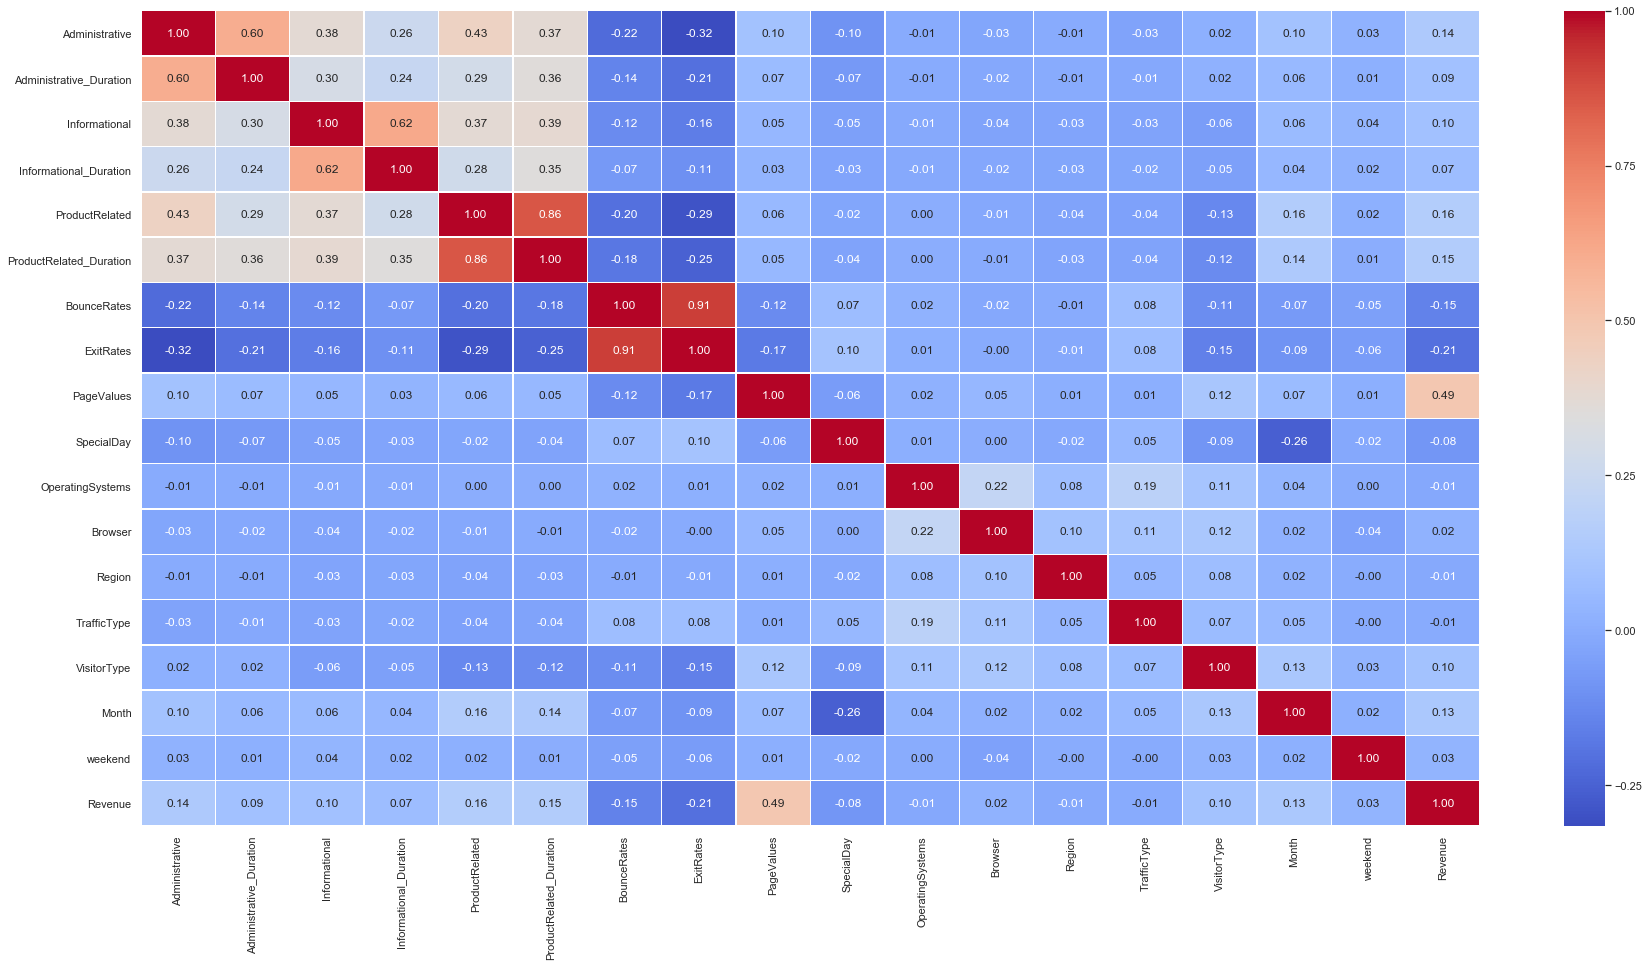

In [27]:
sns.set(rc={'figure.figsize':(30,15)})
sns.heatmap(data.corr(), linewidths=0.5, annot=True, fmt='.2f', cmap='coolwarm')

# Data Visualizaion - Exploratory Data Analyis

# Univariate Feature Analysis

- Countplot is used to display dichotomical division of boolean variables. 
- Stacked barplot neatly display proportional distribution of values in categorical variable. 

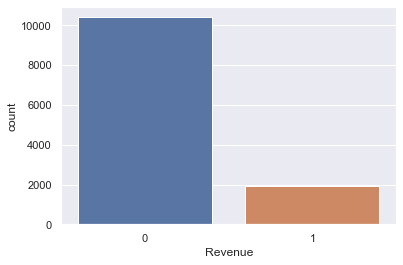

In [28]:
# We notice that target variable's boolean values are imbalanced. No revenue generated visits significantly outnumber revenue generated visit
sns.set(rc={'figure.figsize':(6,4)})
sns.countplot(x='Revenue', data=data)

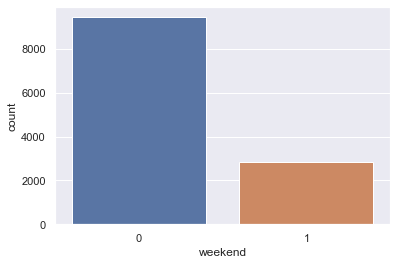

In [29]:
# About one third of purchase was made during weekend, which doesn't demonstrate weekend as a decision-making factor for purchase
sns.countplot(x='weekend', data=data)


In [30]:
# dataset name is Data instead of DF
def bar_chart(feature):
    Revenue_yes = df[df['Revenue']==True][feature].value_counts()
    Revenue_no = df[df['Revenue']==False][feature].value_counts()
    data = pd.DataFrame([Revenue_yes, Revenue_no])
    data.index =['Revenue_yes', 'Revenue_no']
    data.plot(kind='bar', stacked=True, figsize=(6,4))

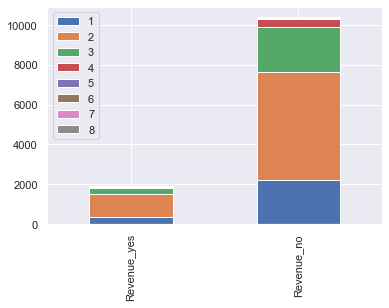

In [31]:
bar_chart('OperatingSystems') 
#proportion of each operating systems in decision for purchase seems quite identical.Therefore, it is not considered influential to response variable

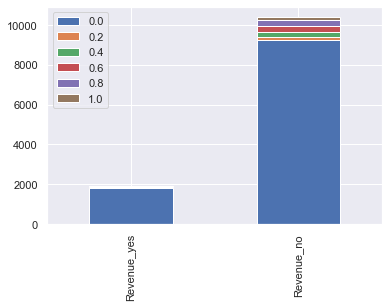

In [32]:
bar_chart('SpecialDay')
# closeness to speical day such as Mother's day is categorized to 6 segments of value; 0 being the closest and 1 being the furthest.
# the bar chart demonstrates that shoppers predominantely make purchase as time gets closer to Special Days. 
# Therefore, we can consider that Special Day may have correlation with response variable

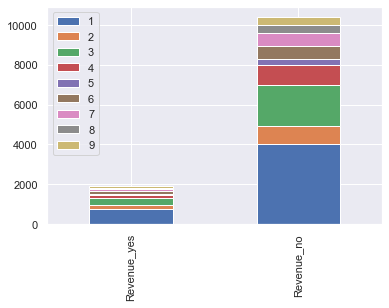

In [33]:
bar_chart('Region') # proportion of each region's size of popultion is reflected in buyer's regional distribution.
# Therefore, Region may be not influential to response variable

# Bivariate Analysis

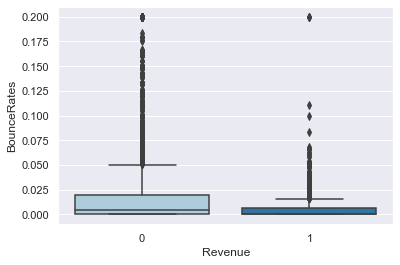

In [34]:
sns.boxplot(data=data, y='BounceRates', x ='Revenue', palette='Paired')
# visitors that make purchase show low bounce rate

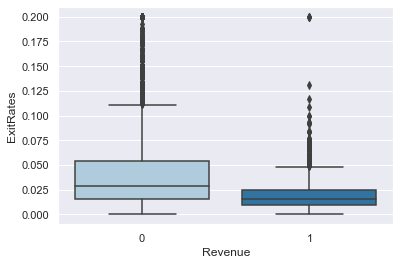

In [35]:
sns.boxplot(data=data, y='ExitRates', x ='Revenue', palette='Paired')
# Median and interquartile value of Exit Rate for visitors with purchase is higher than that of BounceRate

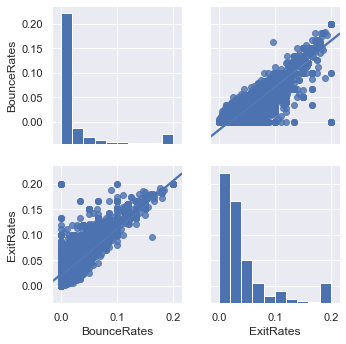

In [36]:
sns.pairplot(data, vars=['BounceRates', 'ExitRates'], kind='reg');
# There is conspicous linear relation between Bounce Rates and Exit Rates

C:\Users\raehy\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


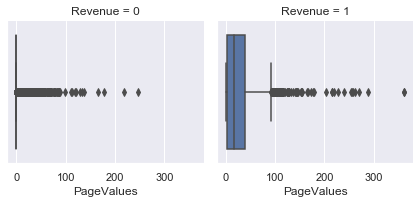

In [37]:
pagevalues = sns.FacetGrid(data, col='Revenue');
pagevalues.map(sns.boxplot, 'PageValues');
# Pages value between 25 to 50 attract most of users who are convinced to purchase.

(0, 50)

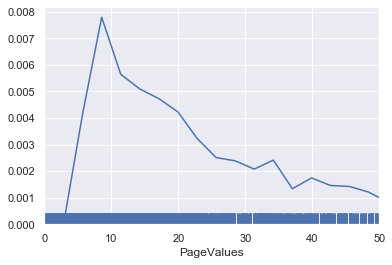

In [38]:
sns.distplot(data['PageValues'], hist=False, rug=True)
plt.xlim(0,50)
# The median Page Values is around 8, after 20, distribution of data becomes scarce. 

(0, 50)

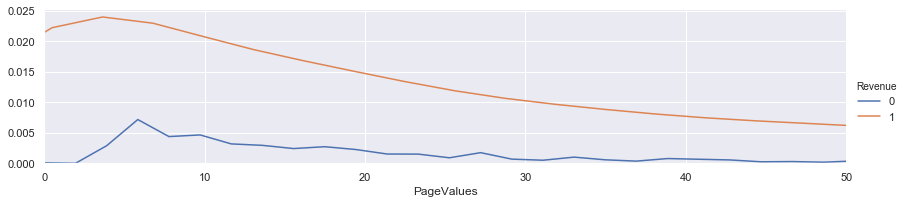

In [39]:
pagevalues = sns.FacetGrid(data, hue='Revenue', aspect=4);
pagevalues.map(sns.kdeplot, 'PageValues');
pagevalues.add_legend()
plt.xlim(0,50)
#Copmaring the distplot above, it is noticeable that PageValue plays significant role in deicions to make purchase.

# Multi-virate Analysis

(0, 0.2)

<Figure size 432x288 with 0 Axes>

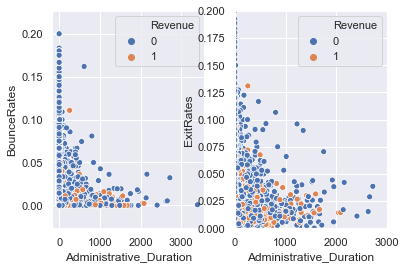

In [40]:
plt.figure()
f, axes = plt.subplots(1, 2)
sns.scatterplot(data=data, x='Administrative_Duration', y='BounceRates', hue='Revenue', ax=axes[0])
sns.scatterplot(data=data, x='Administrative_Duration', y='ExitRates', hue='Revenue', ax=axes[1])
plt.xlim(0,3000)
plt.ylim(0,0.2)

(0, 0.2)

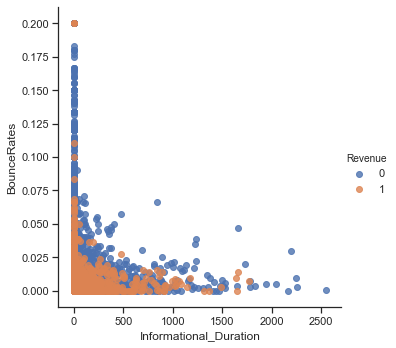

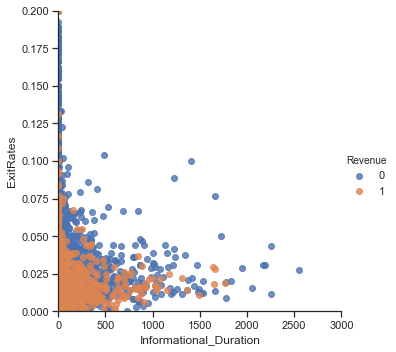

In [41]:
sns.set(style='ticks')
sns.lmplot(data=data, x='Informational_Duration', y='BounceRates', hue='Revenue',fit_reg=False)
sns.lmplot(data=data, x='Informational_Duration', y='ExitRates', hue='Revenue', fit_reg= False)
plt.xlim(0,3000)
plt.ylim(0,0.2)

Text(0.5, 1.0, 'Page Values vs Visitor Type')

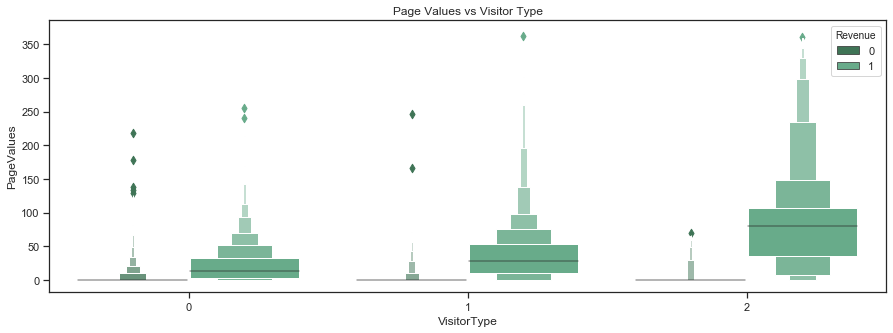

In [42]:
fig = plt.figure(figsize=(15,5))
sns.boxenplot(data=data, x='VisitorType', y ='PageValues', hue='Revenue', palette='BuGn_d')
plt.title('Page Values vs Visitor Type')

# Returning_Visitor:0, New_Visitor:1, Other:2
# Across all types of visitors, visitors with intention to make purchase are linked through webpages with high page value.
# For non-returning visitors, the role of page value is more important to convince them to make purchase.

Text(0.5, 1.0, 'Visitor Type vs Exit Rates')

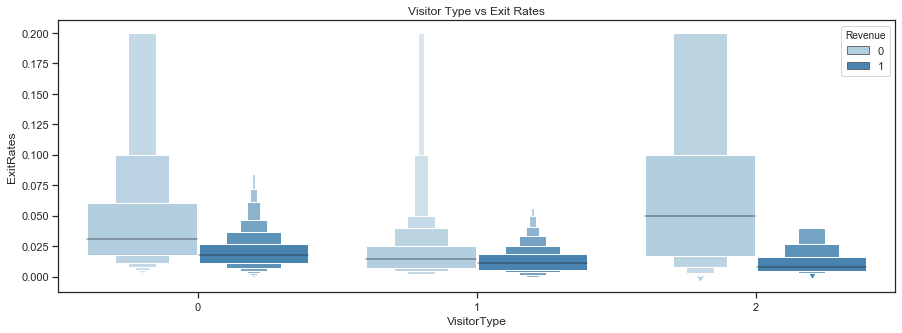

In [43]:
fig = plt.figure(figsize=(15,5))
sns.boxenplot(data=data, x='VisitorType', y ='ExitRates', hue='Revenue', palette='Blues')
plt.title('Visitor Type vs Exit Rates')
# Exit rate among first visitor (1) is lower than other types of visitors. 

Text(0.5, 1.0, 'Region vs Page Values')

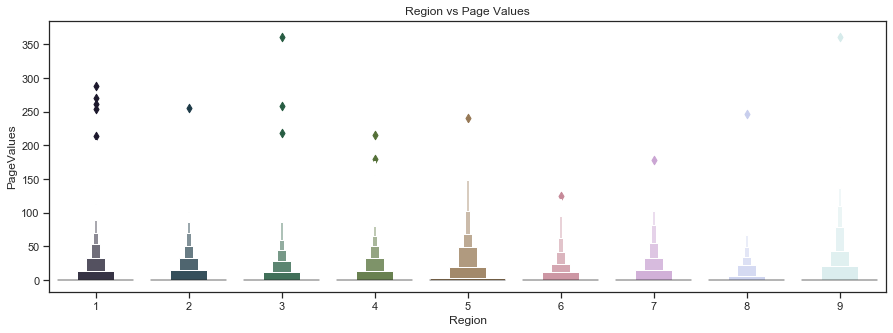

In [44]:
fig = plt.figure(figsize=(15,5))
sns.boxenplot(data=data, x='Region', y ='PageValues', palette='cubehelix')
plt.title('Region vs Page Values')
# Region 4 and 9 indicate slight more reliance on page value 

Text(0.5, 1.0, 'Region vs Exit Rates')

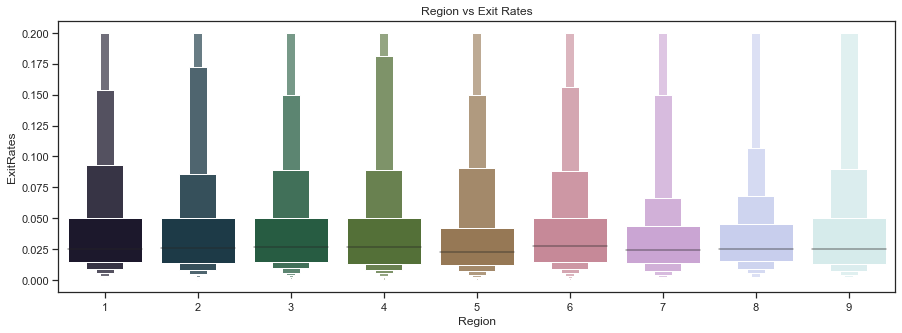

In [45]:
fig = plt.figure(figsize=(15,5))
sns.boxenplot(data=data, x='Region', y ='ExitRates', palette='cubehelix')
plt.title('Region vs Exit Rates') 
# Exit rates across all regions are very even 

# Machine learning Model 
- Let's prepare four popular ML models as classification.  These models can conveniently loaded up via  Sklearn library.

1. Decision Tree
2. K-Neighbor
3. Logistic Regression
4. Random Forest


In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report 



# Split dataset to train and test

- The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.
-  The test_size=0.2 inside the function indicates the percentage of the data that should be held over for testing. It’s usually around 80/20 or 70/30.

In [47]:
features = ['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay','OperatingSystems','Browser','Region','TrafficType','VisitorType','Month','weekend']
X= data[features]
y =data.Revenue

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, stratify =y, random_state =1 )

# Decision Tree Model

- A decision tree is a flowchart-like structure in which each internal node represents a “test” on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.
-  Tree based learning algorithms are considered to be one of the best and mostly used supervised learning methods. Tree based methods empower predictive models with high accuracy, stability and ease of interpretation.

# Parameters
- Creiterion: The fuction to measure the quality of a split. Supported criteria are "gini" for Gini impurity
- max_dempth: Maximum deapth of tree, or how much a node should be expanded. 5 is moderate depth 
- min_samples_ split :  The minimum number of samples a node must contain in order to consider splitting.

In [49]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=100, criterion = 'gini', random_state=1)

In [50]:
dt = dt.fit(X_train, y_train)

In [51]:
y_pred = dt.predict(X_test)

# Decision Tree Accuracy Score

In [117]:
dt_acc_score = metrics.accuracy_score(y_test, y_pred)
dt_acc_score

0.8741883116883117

# Confusion Matrix  & Classificaiton Report

- A confusion matrix is a summary of prediction results on a classification problem.
The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.
The confusion matrix shows the ways in which your classification model is confused when it makes predictions.
It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.


- true positives (TP): These are cases in which we predicted yes (they have the disease), and they do have the disease.
- true negatives (TN): We predicted no, and they don't have the disease.
- false positives (FP): We predicted yes, but they don't actually have the disease. (Also known as a "Type I error.")
- false negatives (FN): We predicted no, but they actually do have the disease. (Also known as a "Type II error.")

In [53]:
print(metrics.confusion_matrix(y_test,y_pred)) # 1981 and 239 respresnet accuracy 

[[1981  101]
 [ 143  239]]


- A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False. More specifically, True Positives, False Positives, True negatives and False Negatives are used to predict the metrics of a classification report

- Precision : Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives.

- Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

In [54]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2082
           1       0.70      0.63      0.66       382

    accuracy                           0.90      2464
   macro avg       0.82      0.79      0.80      2464
weighted avg       0.90      0.90      0.90      2464



# DT - Cross Validation 

In [96]:
scores_cv_dt= cross_val_score(dt, X, y, cv=10, scoring = 'accuracy')
print(scores_cv_dt)

[0.875      0.90503247 0.93587662 0.86688312 0.90665584 0.81899351
 0.87175325 0.88636364 0.88780488 0.86585366]


In [97]:
print(scores_cv_dt.mean()) 

0.8820216978143808


In [55]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import io
import pydotplus
from scipy import misc
import matplotlib.image as mpimg
import imageio

%matplotlib inline

C:\Users\raehy\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# Visualization of Decision Tree Nodes

In [56]:
def show_tree(tree, features, path):
    f= io.StringIO()
    export_graphviz(tree, out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = imageio.imread(path)
    plt.rcParams['figure.figsize']= (200,200)
    plt.imshow(img)

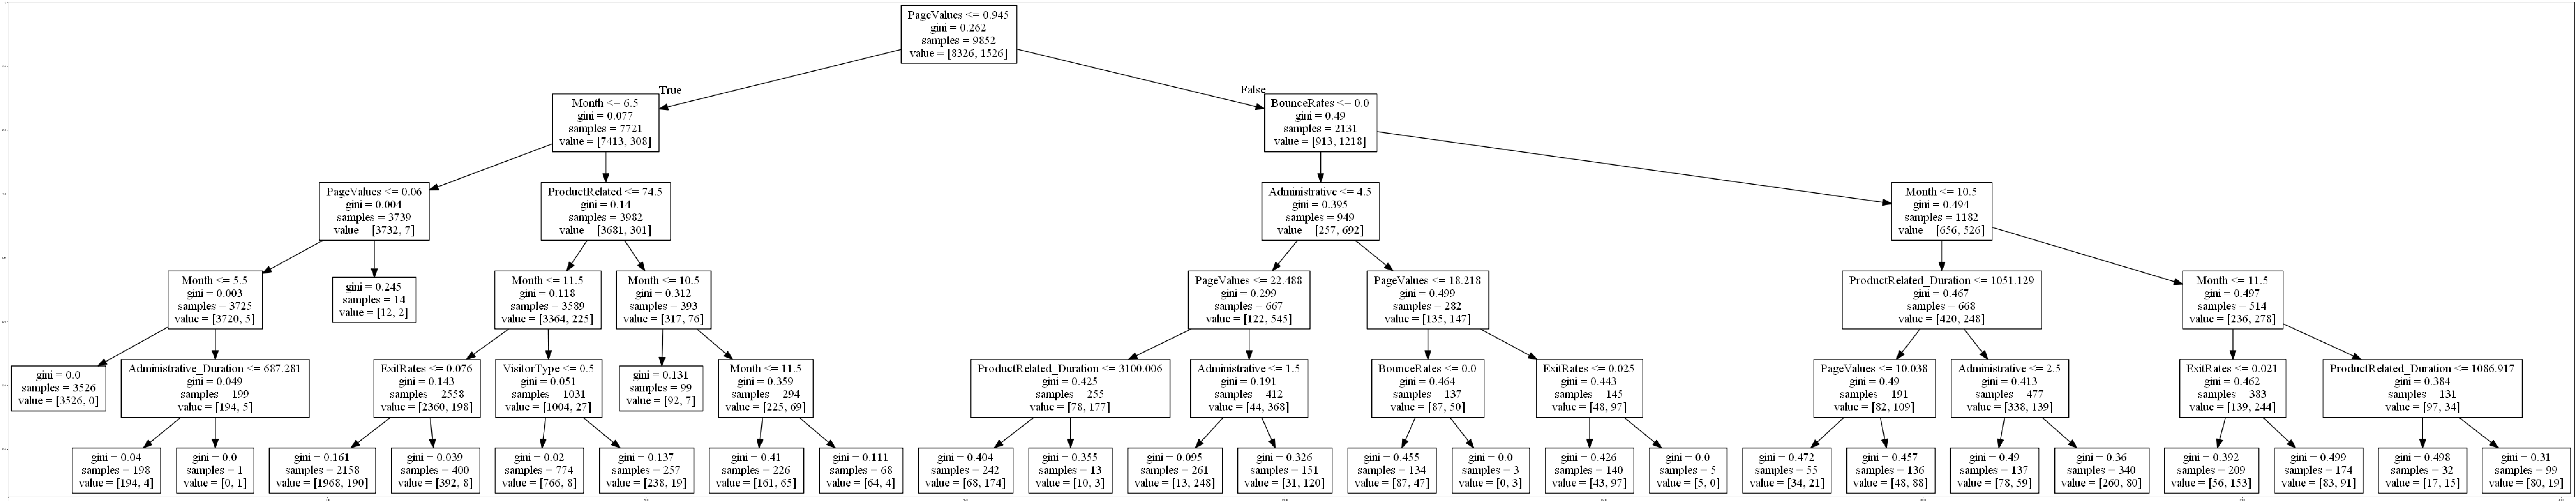

In [57]:
show_tree(dt, features, 'doc_tree_01.png')

# KNeighborsClassifier

- The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.
- The KNN algorithm hinges on this assumption being true enough for the algorithm to be useful. KNN captures the idea of similarity (sometimes called distance, proximity, or closeness) with some mathematics we might have learned in our childhood— calculating the distance between points on a graph.

In [58]:
knn = KNeighborsClassifier(n_neighbors = 10)


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, stratify =y, random_state =1 )

In [60]:
knn.fit (X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [61]:
y_pred = knn.predict(X_test)

# KNN - Accuracy Score

In [119]:
knn_acc_score = metrics.accuracy_score(y_test, y_pred)
knn_acc_score

0.8741883116883117

# KNN - Cross Validation 

In [63]:
scores_cv_knn= cross_val_score(knn, X, y, cv=10, scoring = 'accuracy')
print(scores_cv_knn)

[0.87581169 0.88392857 0.88717532 0.86444805 0.86282468 0.86038961
 0.85551948 0.85876623 0.86097561 0.85853659]


In [65]:
print(scores_cv_knn.mean())

0.8668375831485589


# Logistics Regression

- Logistic regression is a statistical method for analysing a dataset in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable (in which there are only two possible outcomes). It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [106]:
y_pred = logreg.predict(X_test)

# Logreg Accuracy Score

In [107]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.87


# Logreg-Cross Validation 

In [108]:
scores_cv_logreg= cross_val_score(logreg, X, y, cv=10, scoring = 'accuracy')
print(scores_cv_logreg)

[0.88230519 0.89366883 0.89285714 0.88474026 0.88636364 0.86688312
 0.87175325 0.86607143 0.8804878  0.86585366]


In [109]:
print(scores_cv_logreg.mean()) 

0.8790984320557491


# ROC Curve - Logistic Regression
-  AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. 
-  As we see below our curve is parabolically skewed to 1, which means our logistics regression model performed well in prediction 

In [110]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [111]:
# ROC_AUC_Score
y_pred_prob=logreg.predict_proba(X_test)[:,1]

In [112]:
logreg_roc_score = metrics.roc_auc_score(y_test, y_pred_prob)
logreg_roc_score

0.8999556855657975

In [113]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
y_pred_prob= logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

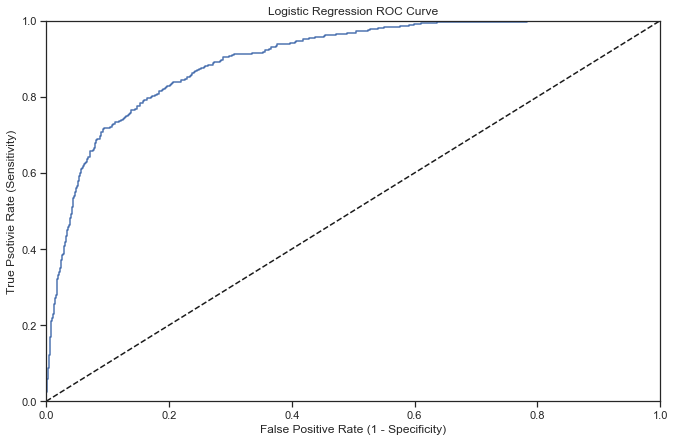

In [114]:
plt.figure(figsize=(11,7)) 
fpr, tpr, threshiold = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('Logistic Regression ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Psotivie Rate (Sensitivity)')
plt.show()

#  Random Forest Classifier

-  Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.

-  It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, stratify =y, random_state =1 )

In [86]:
clf=RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=7, min_samples_split=100, bootstrap= True, max_features = 'sqrt')

In [87]:
clf = clf.fit(X_train, y_train)

In [88]:
y_pred = clf.predict(X_test)

# Random Forest Accuracy Score

In [89]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9054383116883117


# Random Forest ROC AUC Score

In [90]:
clf_pred_prob = clf.predict_proba(X_test)[:,1]

In [98]:
# Congrat !! the highest score among ML models
RF_roc_score = metrics.roc_auc_score(y_test, clf_pred_prob)
RF_roc_score

0.9305540886481485

In [92]:
# add response prediction to X_test dataframe

In [93]:
df_pred = pd.DataFrame(y_pred, index=X_test.index, columns=['y_pred'])

In [94]:
X_test['Predicted Revenue'] = df_pred;
X_test.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Month,weekend,Predicted Revenue
7745,0.0,0.00,0.0,0.00,1.0,0.000000,0.200000,0.200000,0.000000,0.0,3,2,1,1,0,7,0,0
2992,4.0,166.50,1.0,27.00,21.0,452.814103,0.044000,0.047238,0.000000,0.0,3,2,4,3,0,5,0,0
6022,8.0,167.45,1.0,168.20,33.0,755.876984,0.026316,0.041316,0.000000,0.0,2,2,3,3,0,10,0,0
6316,1.0,94.80,0.0,0.00,6.0,223.100000,0.000000,0.009524,0.000000,0.0,5,11,8,14,0,9,0,0
3166,0.0,0.00,0.0,0.00,46.0,2213.366667,0.034783,0.054710,0.000000,1.0,3,2,3,13,0,5,1,0
8306,4.0,159.00,2.0,27.75,33.0,821.682540,0.000617,0.019343,0.000000,0.0,2,2,1,2,0,12,0,0
9643,1.0,0.00,0.0,0.00,77.0,4350.647321,0.012727,0.023843,14.385468,0.0,2,2,1,2,0,11,0,0
1867,2.0,6.00,1.0,35.00,12.0,240.000000,0.014286,0.042857,0.000000,0.0,2,2,7,10,0,3,0,0
11781,0.0,0.00,0.0,0.00,12.0,461.108333,0.000000,0.007692,45.055549,0.0,3,2,1,1,0,11,0,1
152,0.0,0.00,0.0,0.00,4.0,16.000000,0.100000,0.150000,0.000000,0.0,2,5,5,1,0,2,0,0


# Model Evaluation
- We can now rank our evaluation of all the models to choose the best one for our problem

In [121]:
models = pd.DataFrame({'Model':['Random Forest','Decision Tree','Logistic Regression','KNN'], 'Score': [RF_roc_score, dt_acc_score, logreg_roc_score, knn_acc_score]})
models.sort_values(by='Score', ascending = False) 

,Model,Score
0,Random Forest,0.930554
2,Logistic Regression,0.899956
1,Decision Tree,0.874188
3,KNN,0.874188


# Find Important Features 

- Let us find out which feature contributed the most for prediction 

In [122]:
feature_imp = pd.Series(clf.feature_importances_, index=features).sort_values(ascending=False)

In [123]:
feature_imp

PageValues                 0.613111
ExitRates                  0.074660
Month                      0.071034
ProductRelated_Duration    0.061505
ProductRelated             0.050091
BounceRates                0.038507
Administrative             0.024732
Administrative_Duration    0.023755
VisitorType                0.010207
Informational_Duration     0.006693
Informational              0.005661
TrafficType                0.005204
SpecialDay                 0.004315
Region                     0.003707
Browser                    0.003234
OperatingSystems           0.002495
weekend                    0.001089
dtype: float64

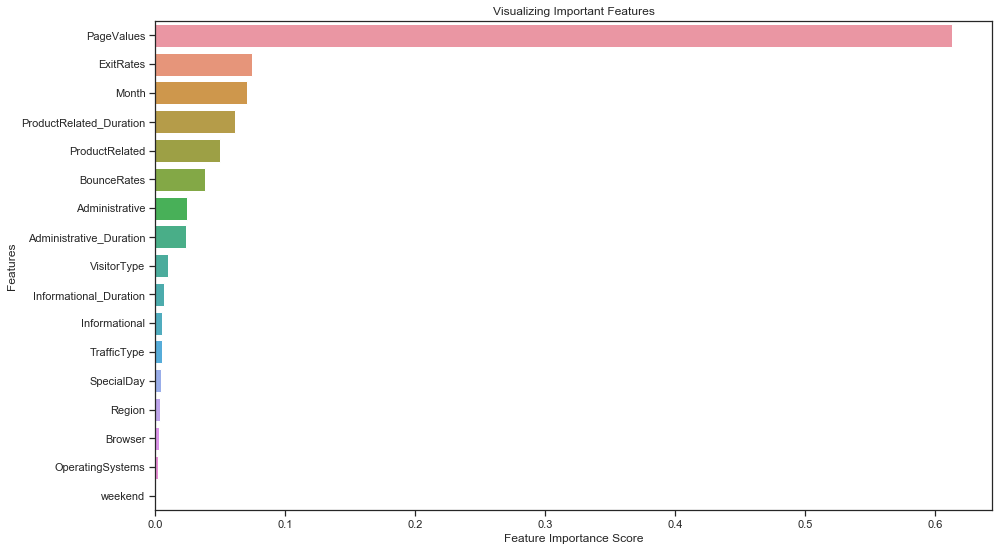

In [124]:
plt.figure(figsize=(15,9)) 
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

# 3D Visualization - Covariance of three imporant features 

In [125]:
from mpl_toolkits.mplot3d import Axes3D 

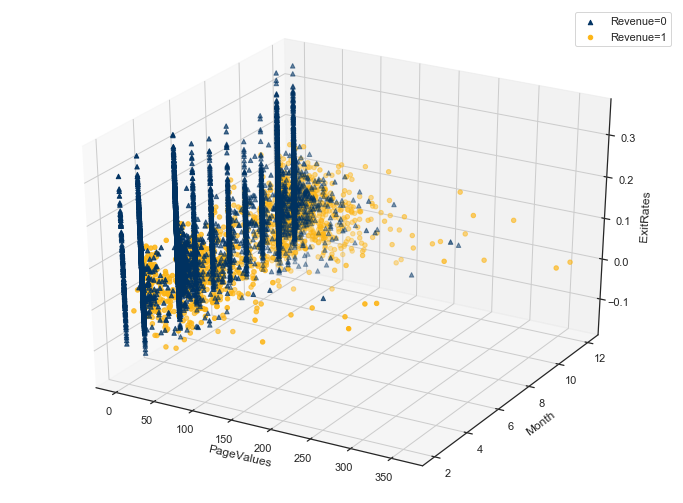

In [126]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

revenue_pos = data[data.Revenue == 1]
revenue_neg = data[data.Revenue == 0]

x_label = 'PageValues'
y_label = 'Month'
z_label = 'ExitRates'

for clf, m, l, c in [(revenue_neg, '^', 'Revenue=0', '#003262'), (revenue_pos, 'o', 'Revenue=1', '#FDB515')]:
    ax.scatter(clf[x_label], clf[y_label], (clf[z_label] + np.random.normal(scale=0.05, size=clf.shape[0])), marker=m, label=l, color=c)
    
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_zlabel(z_label)

plt.legend();

# The End 